In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df = pd.read_csv(r'C:\Users\Rahul Miglani\Untitled Folder\loan.csv',
                 skipinitialspace=True,
                 header=1)
df.head()

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [36]:
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [37]:
# Convert ID and Interest Rate to numeric.
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
df.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [38]:
df = df[:-2]

In [40]:
df = df.replace([0,' ','NULL'],np.nan)
df.dropna(thresh=df.shape[0]*0.6,how='any',axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,...,NaN,2.0,78.9,NaN,NaN,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,...,NaN,2.0,100.0,66.7,NaN,NaN,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,...,NaN,NaN,100.0,20.0,NaN,NaN,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,...,NaN,NaN,91.7,22.2,NaN,NaN,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,8 years,...,NaN,12.0,100.0,50.0,1.0,NaN,38998.0,18926.0,2750.0,18248.0


In [41]:
df.drop(['id','member_id'],axis = 1,inplace = True)

In [42]:
df.shape

(421095, 101)

In [43]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([missing_values, percent_missing], axis = 1, keys = ['Total','percent'])[:40]
missing

,Total,percent
num_tl_120dpd_2m,420807,0.999316
dti_joint,420586,0.998791
verification_status_joint,420584,0.998786
annual_inc_joint,420584,0.998786
num_tl_30dpd,419498,0.996208
delinq_amnt,419297,0.995730
acc_now_delinq,418713,0.994343
chargeoff_within_12_mths,417155,0.990643
total_rec_late_fee,413719,0.982484
collections_12_mths_ex_med,413328,0.981555


In [44]:
missing.index   

Index(['num_tl_120dpd_2m', 'dti_joint', 'verification_status_joint',
       'annual_inc_joint', 'num_tl_30dpd', 'delinq_amnt', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'total_rec_late_fee',
       'collections_12_mths_ex_med', 'total_cu_tl', 'inq_fi', 'open_il_12m',
       'collection_recovery_fee', 'recoveries', 'open_acc_6m', 'open_rv_12m',
       'open_il_24m', 'inq_last_12m', 'tax_liens', 'il_util', 'open_rv_24m',
       'open_il_6m', 'total_bal_il', 'mths_since_rcnt_il', 'max_bal_bc',
       'all_util', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'mths_since_last_record', 'pub_rec', 'delinq_2yrs',
       'num_accts_ever_120_pd', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'inq_last_6mths', 'mths_since_last_delinq', 'mort_acc'],
      dtype='object')

In [45]:
df.drop(['policy_code'],axis = 1, inplace = True)

In [46]:
df.drop(['num_tl_120dpd_2m', 'dti_joint', 'annual_inc_joint',
       'verification_status_joint', 'num_tl_30dpd', 'delinq_amnt',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'total_rec_late_fee',
       'collections_12_mths_ex_med', 'total_cu_tl', 'inq_fi', 'open_il_12m',
       'collection_recovery_fee', 'recoveries', 'open_acc_6m', 'open_rv_12m',
       'open_il_24m', 'inq_last_12m', 'tax_liens', 'il_util', 'open_rv_24m',
       'open_il_6m', 'total_bal_il', 'mths_since_rcnt_il', 'max_bal_bc',
       'all_util', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'mths_since_last_record', 'pub_rec', 'delinq_2yrs',
       'num_accts_ever_120_pd', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'inq_last_6mths', 'mths_since_last_delinq', 'mort_acc'],axis = 1,inplace = True)

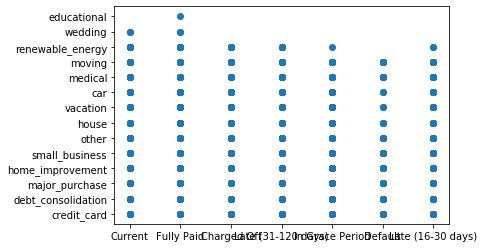

In [47]:
plt.scatter(df['loan_status'], df['purpose'])

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [23]:
newdf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,total_acc,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,11.0,19108.0,19.0,...,11.0,9.0,11.0,2.0,78.9,NaN,298100.0,31329.0,281300.0,13400.0
1,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,7.0,7722.0,9.0,...,4.0,3.0,7.0,2.0,100.0,66.7,88635.0,55387.0,12500.0,75635.0
2,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,9.0,20862.0,19.0,...,9.0,3.0,9.0,NaN,100.0,20.0,373572.0,68056.0,38400.0,82117.0
3,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,16.0,51507.0,24.0,...,18.0,9.0,16.0,NaN,91.7,22.2,304003.0,74920.0,41500.0,42503.0
4,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,18.0,9568.0,19.0,...,17.0,13.0,18.0,12.0,100.0,50.0,38998.0,18926.0,2750.0,18248.0


In [24]:
newdf.corr()['loan_amnt'].sort_values()

percent_bc_gt_75             -0.061037
num_tl_op_past_12m           -0.024280
acc_open_past_24mths         -0.002221
dti                           0.006054
mths_since_recent_inq         0.008181
mo_sin_rcnt_tl                0.040943
mths_since_recent_bc          0.051877
bc_util                       0.060799
num_il_tl                     0.064358
mo_sin_rcnt_rev_tl_op         0.066141
pct_tl_nvr_dlq                0.105070
mo_sin_old_il_acct            0.137099
int_rate                      0.140572
num_actv_rev_tl               0.164360
num_rev_tl_bal_gt_0           0.166097
num_op_rev_tl                 0.174786
num_rev_accts                 0.175080
mo_sin_old_rev_tl_op          0.183754
open_acc                      0.188214
num_sats                      0.189323
num_bc_tl                     0.202558
bc_open_to_buy                0.204552
total_acc                     0.208430
total_il_high_credit_limit    0.210873
num_actv_bc_tl                0.211098
num_bc_sats              

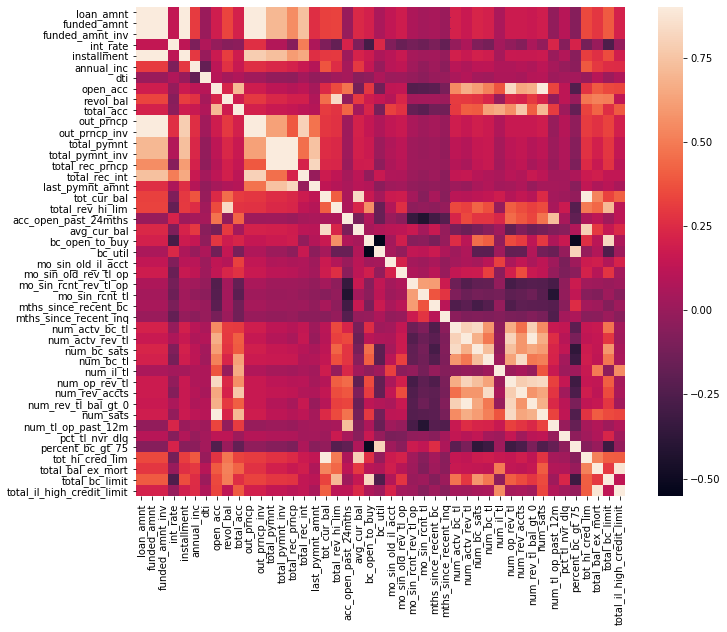

In [25]:
#Correlation map to see how features are correlated with SalePrice
corrmat = newdf.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [26]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'dti', 'open_acc', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'pct_tl_nvr

In [48]:
df.shape

(421095, 60)

In [28]:
df1 = newdf 

In [29]:
df1.shape

(421095, 45)

In [49]:
pd.get_dummies(df)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,total_acc,...,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT
0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,11.0,19108.0,19.0,...,0,0,0,0,0,0,0,0,1,0
1,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,7.0,7722.0,9.0,...,0,0,0,0,0,0,0,0,1,0
2,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,9.0,20862.0,19.0,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,16.0,51507.0,24.0,...,0,0,0,0,0,0,0,0,1,0
4,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,18.0,9568.0,19.0,...,0,0,0,0,0,0,0,0,1,0
5,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,21.0,24940.0,33.0,...,0,0,0,0,0,0,0,0,1,0
6,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,15.0,31682.0,31.0,...,0,0,0,0,0,0,0,0,1,0
7,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,17.0,10711.0,27.0,...,0,0,0,0,0,0,0,0,1,0
8,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,13.0,7802.0,17.0,...,0,0,0,0,0,0,0,0,1,0
9,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,12.0,21929.0,35.0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
# generating one row  
rows = df.sample(frac =.25) 
  
# checking if sample is 0.25 times data or not 
  
if (0.25*(len(df))== len(rows)): 
    print( "Cool") 
    print(len(df), len(rows)) 
rows.shape

(105274, 60)

In [68]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import timeit
import time

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
X = df.drop('loan_status', 1)
Y = df['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rahul Miglani\Anaconda3\lib\site-pa

--- 212.2853569984436 seconds ---


In [52]:
Y

0                    Current
1                    Current
2                 Fully Paid
3                    Current
4                 Fully Paid
5                    Current
6                    Current
7                 Fully Paid
8                    Current
9                 Fully Paid
10                   Current
11                   Current
12                   Current
13                   Current
14                Fully Paid
15                   Current
16                   Current
17                   Current
18                   Current
19                   Current
20                   Current
21                Fully Paid
22                   Current
23                   Current
24                   Current
25                   Current
26                   Current
27                Fully Paid
28                   Current
29                   Current
                 ...        
421065               Current
421066               Current
421067               Current
421068        

In [109]:
np.mean([0.89950369, 0.90852746, 0.89769894, 0.89655909, 0.87615768,
       0.90420328, 0.86131231, 0.93257973, 0.92573681, 0.9254738 ])

0.9027752790000001

In [2]:
np.mean([0.93365154, 0.92082829, 0.92944836, 0.92294175, 0.91237236,
       0.91847542, 0.91678739, 0.93450331, 0.92326692, 0.93397616])

0.92462515